# Análisis exploratorio de los datos

 ##  1. Carga de datos y verificación inicial

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Subir el archivo csv
from google.colab import files
uploaded = files.upload()

# Obten el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Lee el archivo excel en un DataFrame de pandas
data = pd.read_csv(file_name)

# Muestra las primeras filas del DataFrame
data.head()

Saving Online-eCommerce (2).csv to Online-eCommerce (2) (1).csv


Order_Number State_Code   Customer_Name  Order_Date     Status  \
0      139374.0         AP     Adhir Samal  11/01/2020  Delivered   
1      139375.0         AP  Dannana Jhammi  11/01/2020  Delivered   
2      139376.0         AS     Vipin Kumar  11/01/2020  Delivered   
3      139377.0         BR   Ranjeet Kumar  11/01/2020  Delivered   
4      139378.0         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

In [4]:
print(data.shape)

(5110, 14)


In [5]:
# Se muestran las primeras filas del dataset
print(data.head())

   Order_Number State_Code   Customer_Name  Order_Date     Status  \
0      139374.0         AP     Adhir Samal  11/01/2020  Delivered   
1      139375.0         AP  Dannana Jhammi  11/01/2020  Delivered   
2      139376.0         AS     Vipin Kumar  11/01/2020  Delivered   
3      139377.0         BR   Ranjeet Kumar  11/01/2020  Delivered   
4      139378.0         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150

In [6]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB
None


## 2. Limpieza de datos

Al hacer el primer análisis, se detecta que la categoría Motherboard está escrita de dos formas diferentes (Motherboard y MotherBoard) por lo que se unifican en una misma categoría llamada Motherbord.

In [9]:
# Unificar las categorías 'MotherBoard' y 'Motherboard' a 'Motherboard'
data['Category'] = data['Category'].replace({'MotherBoard': 'Motherboard', 'Motherboard': 'Motherboard'})

# Verificar los cambios
print("\nDatos después de unificar 'MotherBoard' y 'Motherboard':")
print(data['Category'].unique())


Datos después de unificar 'MotherBoard' y 'Motherboard':
['SSD' 'CPU' 'Graphic Card' 'RAM' 'Motherboard' 'Cabinet' 'Keyboard' nan
 'Mouse' 'Monitor' 'HDD' 'Computer Case' 'NIC' 'Printer']


In [10]:
# Se comprueba si hay valores nulos en el DataFrame
null_counts = data.isnull().sum()
print("Null values in each column before cleaning:\n", null_counts)

Null values in each column before cleaning:
 Order_Number           15
State_Code             15
Customer_Name          15
Order_Date             15
Status                 15
Product                15
Category               15
Brand                  15
Cost                   15
Sales                  15
Quantity               15
Total_Cost             15
Total_Sales            15
Assigned Supervisor    15
dtype: int64


In [11]:
# Se muestran las filas con valores nulos para inspeccionarlas
print("Rows with null values:\n", data[data.isnull().any(axis=1)])

Rows with null values:
      Order_Number State_Code Customer_Name Order_Date Status Product Category  \
7             NaN        NaN           NaN        NaN    NaN     NaN      NaN   
8             NaN        NaN           NaN        NaN    NaN     NaN      NaN   
12            NaN        NaN           NaN        NaN    NaN     NaN      NaN   
27            NaN        NaN           NaN        NaN    NaN     NaN      NaN   
45            NaN        NaN           NaN        NaN    NaN     NaN      NaN   
82            NaN        NaN           NaN        NaN    NaN     NaN      NaN   
127           NaN        NaN           NaN        NaN    NaN     NaN      NaN   
149           NaN        NaN           NaN        NaN    NaN     NaN      NaN   
150           NaN        NaN           NaN        NaN    NaN     NaN      NaN   
151           NaN        NaN           NaN        NaN    NaN     NaN      NaN   
185           NaN        NaN           NaN        NaN    NaN     NaN      NaN   
197 

In [12]:
# Se eliminan las filas con cualquier valor nulo
data = data.dropna()

In [13]:
# Se verifica que no quedan valores nulos
print("Datos limpios shape:", data.shape)
print("Valores nulos en cada columna después de la limpieza:\n", data.isnull().sum())

Datos limpios shape: (5095, 14)
Valores nulos en cada columna después de la limpieza:
 Order_Number           0
State_Code             0
Customer_Name          0
Order_Date             0
Status                 0
Product                0
Category               0
Brand                  0
Cost                   0
Sales                  0
Quantity               0
Total_Cost             0
Total_Sales            0
Assigned Supervisor    0
dtype: int64


In [14]:
# Función para comprobar si una columna float se puede convertir a int
def can_convert_to_int(series):
    # Se comprueba si todos los valores son iguales a su representación entera
    return (series == series.astype(int)).all()

In [15]:
# Iterar sobre columnas con tipo de datos float64
for col in data.select_dtypes(include=['float64']).columns:
    if can_convert_to_int(data[col]):
        # Convertir la columna a entero
        data[col] = data[col].astype(int)
        print(f"Columna {col} convertida a entero")
    else:
        print(f"Columna {col} permanece como float64")

Columna Order_Number convertida a entero
Columna Cost convertida a entero
Columna Sales convertida a entero
Columna Quantity convertida a entero
Columna Total_Cost convertida a entero
Columna Total_Sales convertida a entero


In [16]:
# Se verifican los cambios
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order_Number         5095 non-null   int64 
 1   State_Code           5095 non-null   object
 2   Customer_Name        5095 non-null   object
 3   Order_Date           5095 non-null   object
 4   Status               5095 non-null   object
 5   Product              5095 non-null   object
 6   Category             5095 non-null   object
 7   Brand                5095 non-null   object
 8   Cost                 5095 non-null   int64 
 9   Sales                5095 non-null   int64 
 10  Quantity             5095 non-null   int64 
 11  Total_Cost           5095 non-null   int64 
 12  Total_Sales          5095 non-null   int64 
 13  Assigned Supervisor  5095 non-null   object
dtypes: int64(6), object(8)
memory usage: 597.1+ KB
None


In [17]:
# Descripción estadística del dataset
print(data.describe())

        Order_Number          Cost         Sales     Quantity    Total_Cost  \
count    5095.000000   5095.000000   5095.000000  5095.000000   5095.000000   
mean   141921.000000   6066.123651   7885.960746     2.486948  14991.778214   
std      1470.944141   3952.022039   5137.628651     1.113581  12574.918427   
min    139374.000000    350.000000    455.000000     1.000000    350.000000   
25%    140647.500000   2100.000000   2730.000000     2.000000   4500.000000   
50%    141921.000000   6550.000000   8515.000000     2.000000  10720.000000   
75%    143194.500000   8500.000000  11050.000000     3.000000  22950.000000   
max    144468.000000  14500.000000  18850.000000     4.000000  58000.000000   

        Total_Sales  
count   5095.000000  
mean   19489.311678  
std    16347.393955  
min      455.000000  
25%     5850.000000  
50%    13936.000000  
75%    29835.000000  
max    75400.000000  


In [18]:
print(data.shape)

(5095, 14)


## 3. Análisis de distribución de las variables

### 3.1 Distribución de variables numéricas

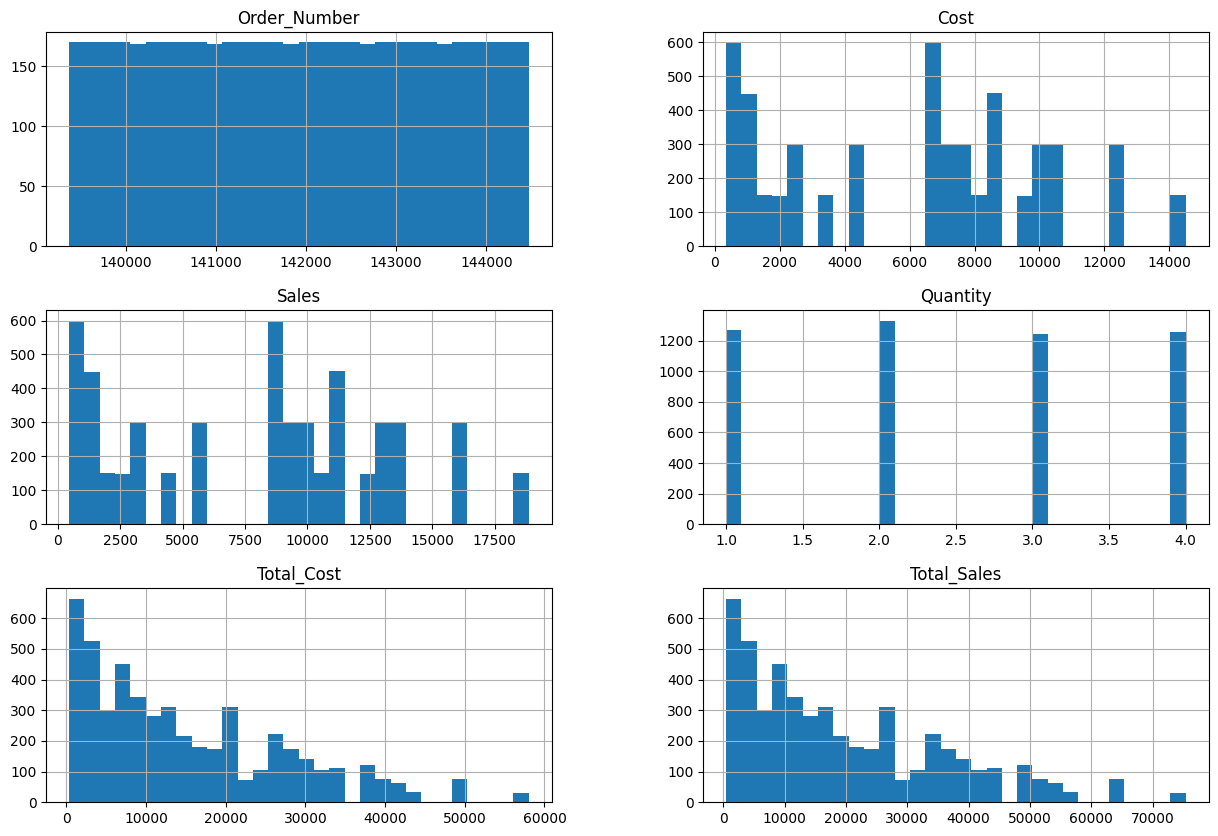

In [19]:
# Histograma de variables numéricas
data.hist(bins=30, figsize=(15, 10))
plt.show()


### 3.2 Distribución de variables categóricas

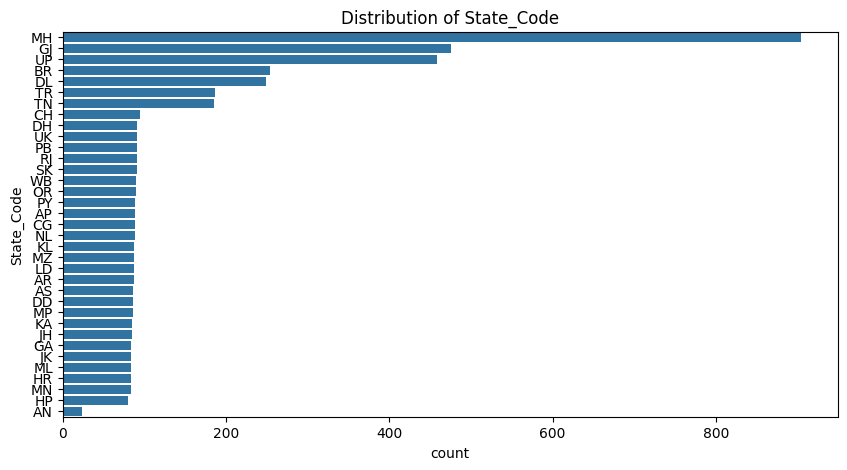

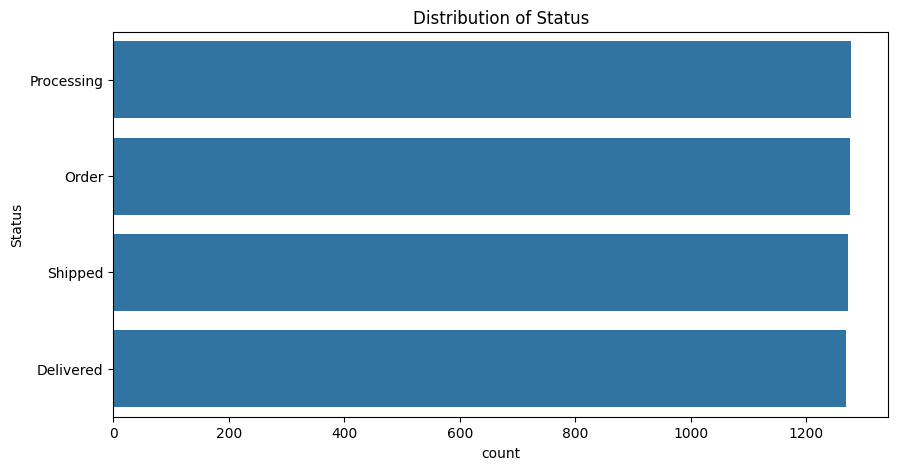

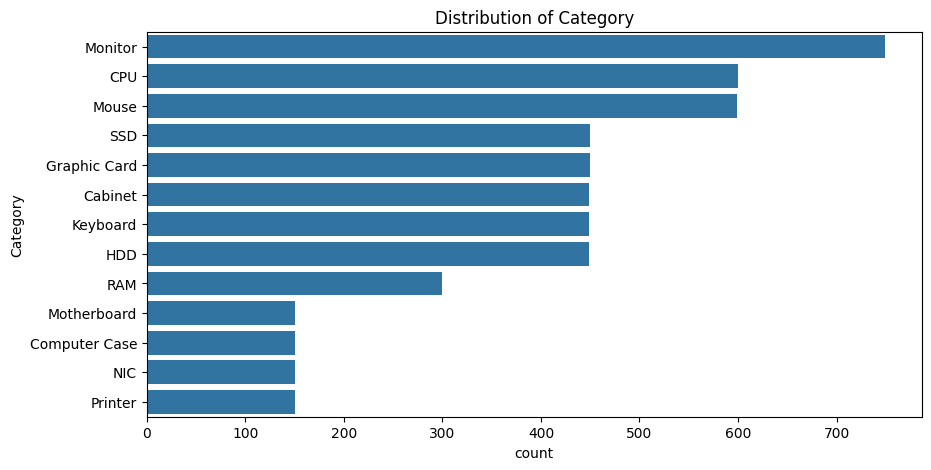

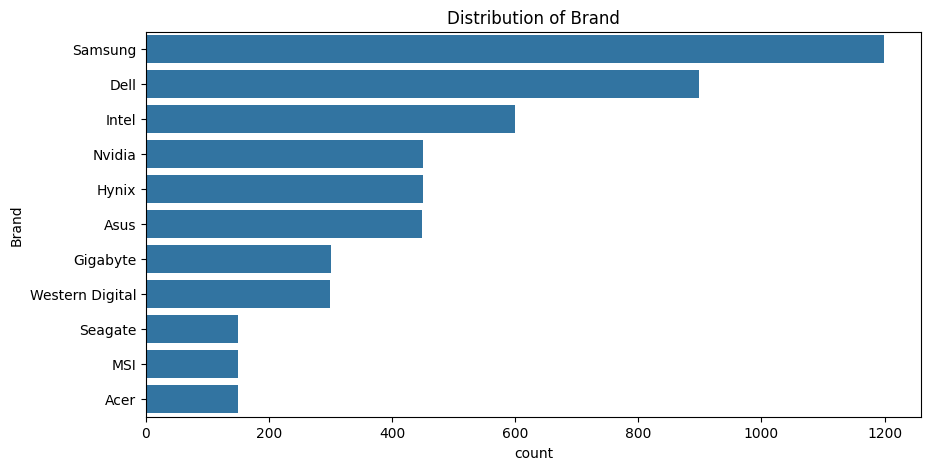

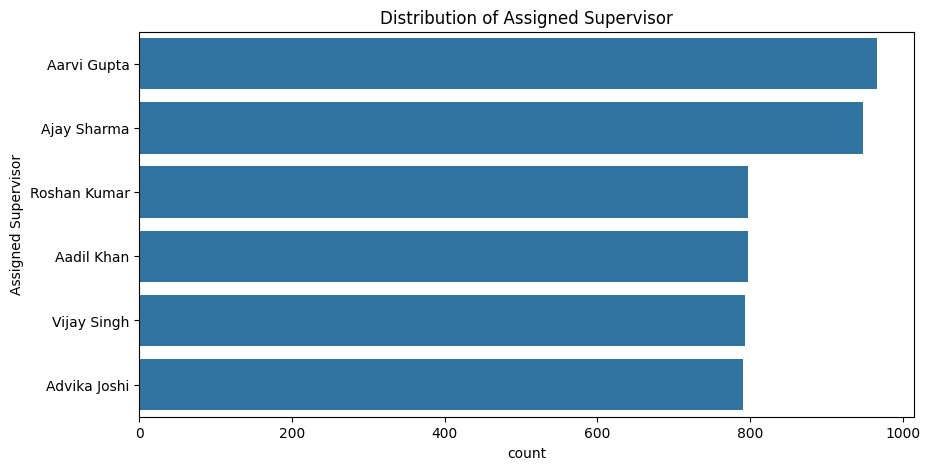

In [20]:
# Gráfico de barras para variables categóricas
categorical_cols = ['State_Code', 'Status', 'Category', 'Brand', 'Assigned Supervisor']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

## 4. Análisis de correlación

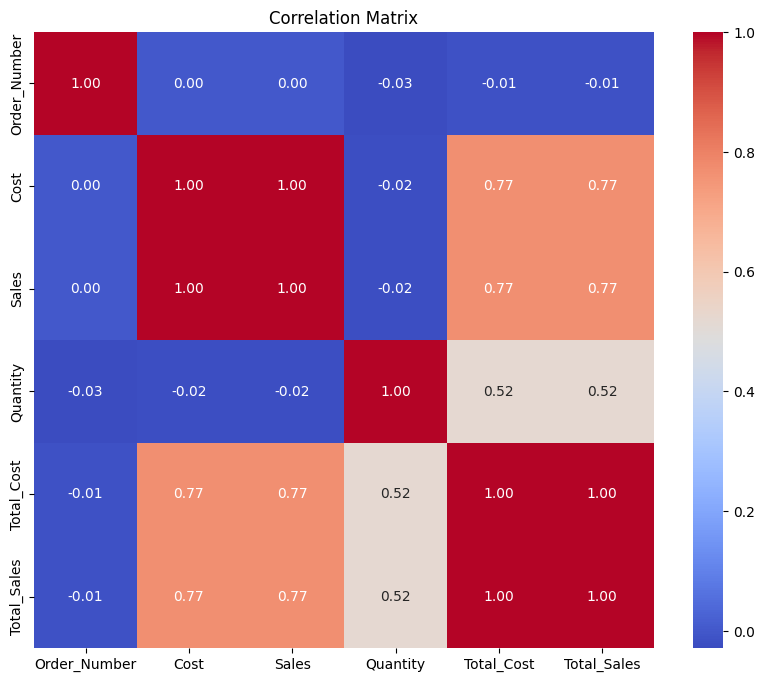

In [21]:
# Seleccionar solo columnas numéricas para el mapa de calor de correlación
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numeric_cols]

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 5. Análisis de ventas

### 5.1 Ventas totales por categoría

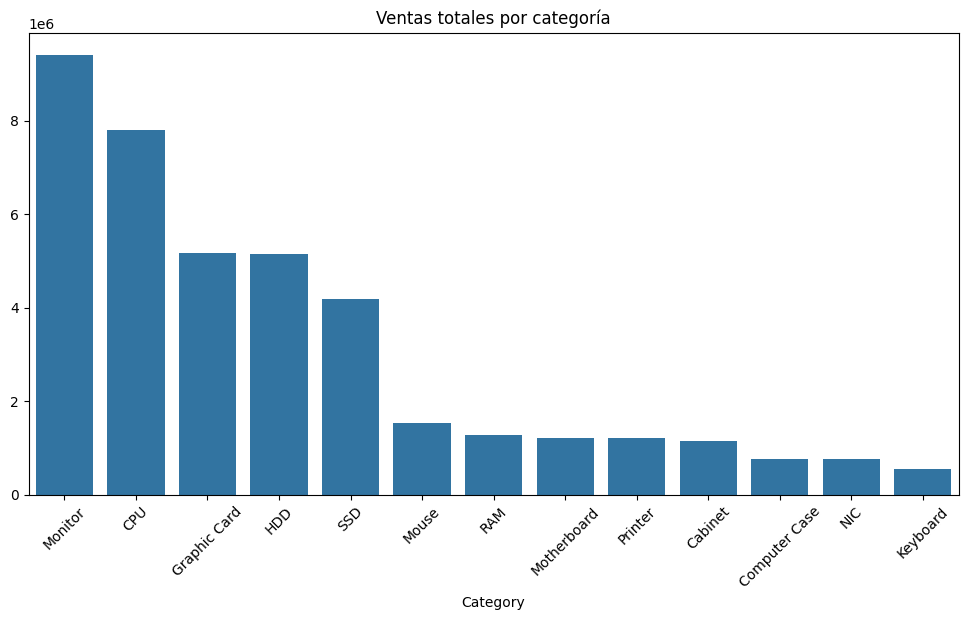

In [22]:
# Ventas totales por categoría
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Ventas totales por categoría')
plt.xticks(rotation=45)
plt.show()


### 5.2 Ventas totales por marca

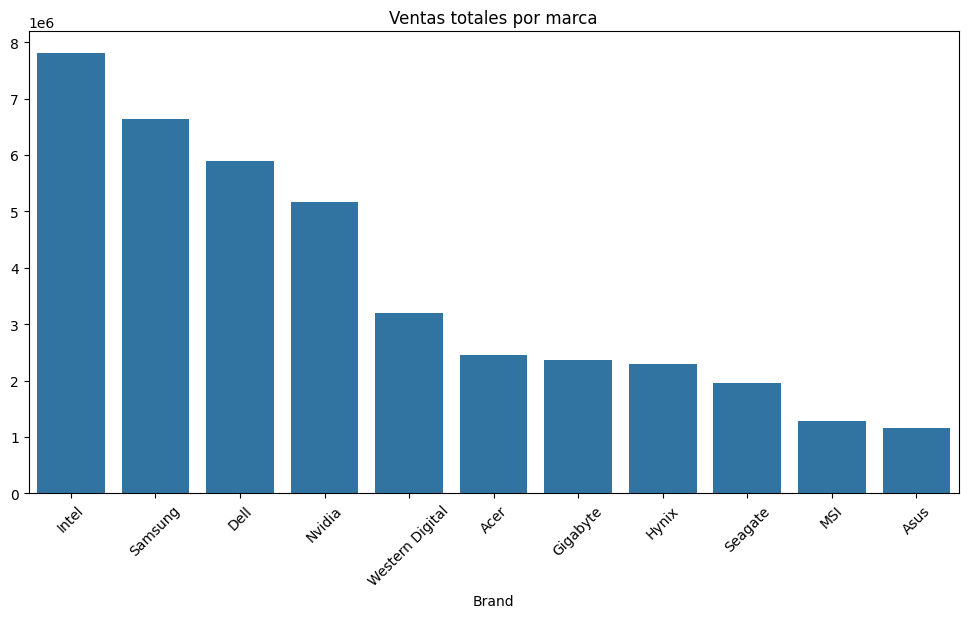

In [23]:
# Ventas totales por marca
brand_sales = data.groupby('Brand')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_sales.index, y=brand_sales.values)
plt.title('Ventas totales por marca')
plt.xticks(rotation=45)
plt.show()


## 6. Análisis de la tendencia de ventas a lo largo del tiempo

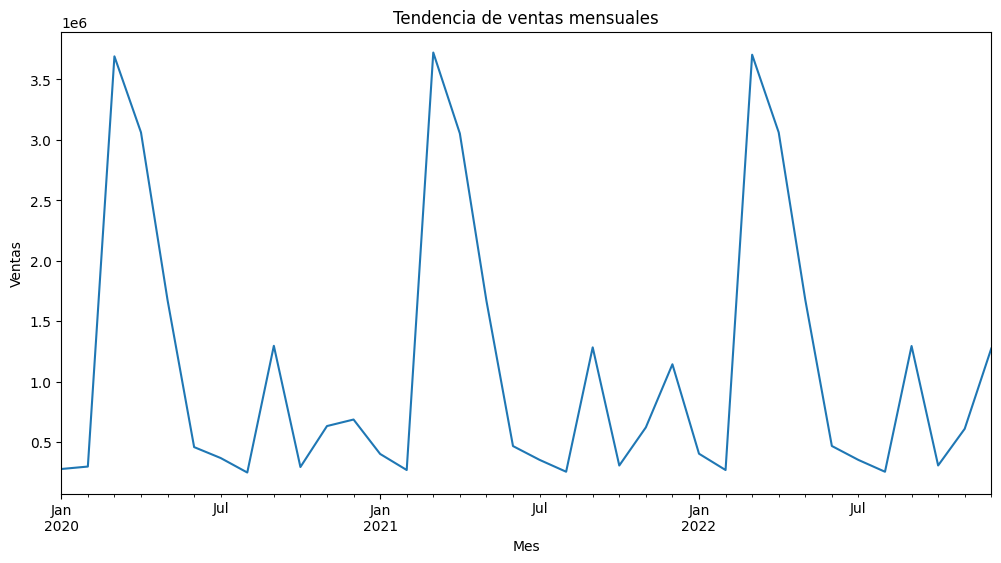

In [24]:
# Convertir 'Order_Date' a tipo datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'], dayfirst=True)

# Ventas mensuales
monthly_sales = data.resample('M', on='Order_Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Tendencia de ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()


## 7. Identificación de los principales clientes por ventas

In [25]:
# Identificar los clientes principales por ventas
top_customers = data.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers_df = top_customers.reset_index()

print(top_customers_df)


           Customer_Name    Sales
0        Rhushikesh Mane  1118104
1            Vipin Kumar  1110954
2      Jay Prakash Kumar  1104454
3            Adhir Samal  1100814
4  Rahul Kumar Prajapati  1098214
5   Suvankar Chakraborty  1095146
6           Kundan Kumar  1094041
7          Sajal Singhal  1091974
8            Kunal Patra  1089894
9         Ashwini Adsare  1088984


## 8. Identificación de los productos más vendidos por cantidad

In [26]:
# Identificar los productos más vendidos por cantidad
top_selling_products = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_products_df = top_selling_products.reset_index()

print(top_selling_products_df)

                    Product  Quantity
0          2GB Graphic Card       791
1           26" LCD Display       402
2        Gaming Box Cabinet       391
3         Wireless Keyboard       390
4    USB Backlight Keyboard       381
5  Standard ATX motherboard       379
6     Micro ATX motherboard       377
7        Intel i3 11th gen.       377
8            Wireless Mouse       375
9                 USB Mouse       374


# Normalización y Estandarización

## 1. Normalización

In [27]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

# data es el DataFrame después de la limpieza de datos
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data_numerical), columns=data_numerical.columns)

# Mostrar las primeras filas del DataFrame normalizado
print(normalized_df.head())

   Order_Number      Cost     Sales  Quantity  Total_Cost  Total_Sales
0      0.000000  0.434629  0.434629  0.000000    0.106678     0.106678
1      0.000196  0.575972  0.575972  0.666667    0.436253     0.436253
2      0.000393  0.469965  0.469965  0.333333    0.236774     0.236774
3      0.000589  0.438163  0.438163  0.666667    0.334779     0.334779
4      0.000785  0.515901  0.515901  1.000000    0.524718     0.524718


## 2. Estandarización

In [ ]:
# Estandarización
from sklearn.preprocessing import StandardScaler

# data es el DataFrame después de la limpieza de datos
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data_numerical), columns=data_numerical.columns)

# Mostrar las primeras filas del DataFrame estandarizado
print(standardized_df.head())

   Order_Number      Cost     Sales  Quantity  Total_Cost  Total_Sales
0     -1.731711  0.109797  0.109797 -1.335416   -0.675361    -0.675361
1     -1.731031  0.615916  0.615916  0.460768    0.835731     0.835731
2     -1.730351  0.236327  0.236327 -0.437324   -0.078877    -0.078877
3     -1.729671  0.122450  0.122450  0.460768    0.370474     0.370474
4     -1.728991  0.400816  0.400816  1.358860    1.241340     1.241340


# Linear Regression with scikit-learn

Mean Squared Error: 1.0544816410611417e-22
R-squared: 1.0


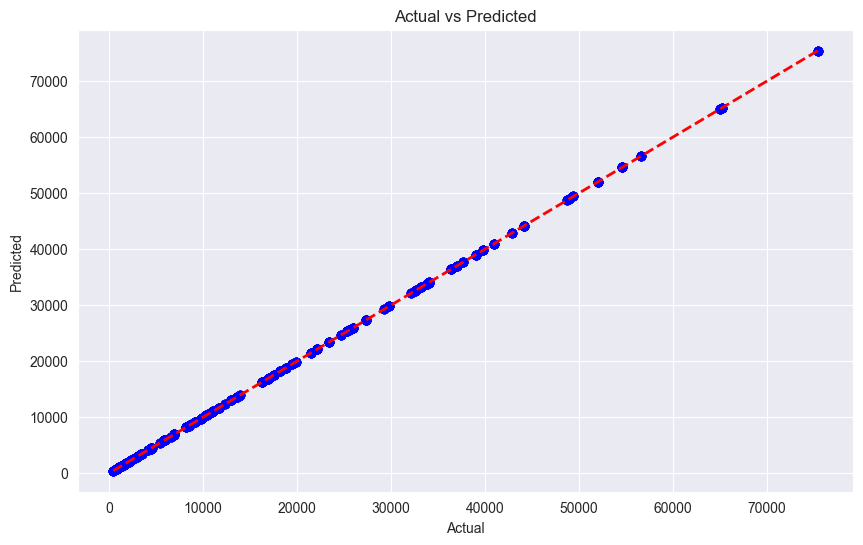

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features (X) and target variable (y)
X = data[['Cost', 'Quantity', 'Total_Cost']]  # Características de ejemplo
y = data['Total_Sales']  # Variable objetivo

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Random forest

## 1. Modelado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# División de test-entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección y entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")


Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R^2: 1.0


## 2. Optimización del modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

# Ajuste de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores parámetros
print(grid_search.best_params_)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluación con el mejor modelo
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized MAE: {mae_best}")
print(f"Optimized MSE: {mse_best}")
print(f"Optimized R^2: {r2_best}")


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Optimized MAE: 0.0
Optimized MSE: 0.0
Optimized R^2: 1.0


## 3. Interpretación del modelo

      Feature  Importance
2  Total_Cost    0.997602
0        Cost    0.002254
1    Quantity    0.000144


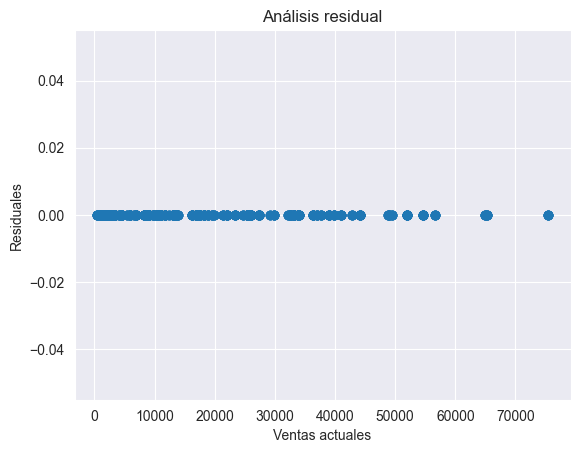

In [ ]:
# Importancia de las características
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Análisis residual
residuals = y_test - y_pred_best
plt.scatter(y_test, residuals)
plt.xlabel('Ventas actuales')
plt.ylabel('Residuales')
plt.title('Análisis residual')
plt.show()


# Filtrado

## 1. Filtrado basado en Contenido

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# Add the Sales - Cost column
data['Sales_Cost_Diff'] = data['Sales'] - data['Cost']

# Using 'Product' column for vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Product'])

# Calculating cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations with additional filters
def get_recommendations(order_number, brand=None, category=None, min_sales_cost_diff=None, cosine_sim=cosine_sim):
    # Attempt to find the index of the given order_number
    try:
        idx = data.index[data['Order_Number'] == order_number][0]  # Use 'Order_Number' as the identifier
    except IndexError:
        return pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])  # Return an empty DataFrame if the order number does not exist

    # Calculate similarity scores for all products with the given product
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the scores based on similarity in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Apply additional filters for brand, category, and sales cost difference
    filtered_indices = []
    for i, score in sim_scores:
        if i != idx:  # Exclude the product itself
            if brand and data.iloc[i]['Brand'] != brand:
                continue
            if category and data.iloc[i]['Category'] != category:
                continue
            if min_sales_cost_diff and data.iloc[i]['Sales_Cost_Diff'] < min_sales_cost_diff:
                continue
            filtered_indices.append((i, score))
            if len(filtered_indices) >= 3:  # Limit to top 3 recommendations
                break

    # Create a DataFrame to hold the recommended products and their similarity scores
    recommendations = pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])
    for idx, score in filtered_indices:
        recommendations = pd.concat([recommendations, pd.DataFrame({
            'Order_Number': [data.iloc[idx]['Order_Number']],
            'Product': [data.iloc[idx]['Product']],
            'Similarity_Score': [score]
        })], ignore_index=True)

    return recommendations

# Getting recommendations for a specific product with additional filters
order_number = 139374  # Replace with the ID of the desired product
brand_filter = 'Samsung'  # Example brand filter
category_filter = 'SSD'  # Example category filter
min_sales_cost_diff_filter = 1000  # Example sales cost difference filter

recommended_products = get_recommendations(order_number, brand=brand_filter, category=category_filter, min_sales_cost_diff=min_sales_cost_diff_filter)

if not recommended_products.empty:
    recommendations = recommended_products.to_dict('records')
    print(f"Recommended products for Order Number {order_number}:")
    for rec in recommendations:
        print(f"Order Number: {rec['Order_Number']}, Product: {rec['Product']}, Similarity Score: {rec['Similarity_Score']}")
else:
    print(f"No recommendations found for Order Number {order_number}. Please check if the ID is correct.")


Recommended products for Order Number 139374:
Order Number: 139408, Product: 513 GB M.2, Similarity Score: 0.08717057205732735
Order Number: 139442, Product: 514 GB M.2, Similarity Score: 0.08717057205732735
Order Number: 139476, Product: 515 GB M.2, Similarity Score: 0.08717057205732735


C:\Users\User\AppData\Local\Temp\ipykernel_9152\2996217446.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recommendations = pd.concat([recommendations, pd.DataFrame({


In [ ]:
# Ensure the Sales - Cost column is present
data['Sales_Cost_Diff'] = data['Sales'] - data['Cost']

# Combine relevant text features into a single string and handle missing values
data['combined_features'] = data['Product'].fillna('') + ' ' + data['Category'].fillna('') + ' ' + data['Brand'].fillna('')

# Function to get recommendations with additional filters
def get_recommendations(order_number, brand=None, category=None, min_sales_cost_diff=None):
    # Using the combined features column for vectorization
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])

    # Calculating cosine similarity
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Attempt to find the index of the given order_number
    try:
        idx = data.index[data['Order_Number'] == order_number][0]  # Use 'Order_Number' as the identifier
    except IndexError:
        return None, pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])  # Return an empty DataFrame if the order number does not exist

    # Display the product name for the given order number
    original_product_name = data.iloc[idx]['Product']

    # Calculate similarity scores for all products with the given product
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the scores based on similarity in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Apply additional filters for brand, category, and sales cost difference
    filtered_indices = []
    for i, score in sim_scores:
        if i != idx:  # Exclude the product itself
            if brand and data.iloc[i]['Brand'] != brand:
                continue
            if category and data.iloc[i]['Category'] != category:
                continue
            if min_sales_cost_diff and data.iloc[i]['Sales_Cost_Diff'] < min_sales_cost_diff:
                continue
            filtered_indices.append((i, score))
            if len(filtered_indices) >= 3:  # Limit to top 3 recommendations
                break

    # Create a DataFrame to hold the recommended products and their similarity scores
    recommendations = pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])
    for idx, score in filtered_indices:
        new_row = pd.DataFrame({
            'Order_Number': [data.iloc[idx]['Order_Number']],
            'Product': [data.iloc[idx]['Product']],
            'Similarity_Score': [score]
        })
        recommendations = pd.concat([recommendations, new_row], ignore_index=True)

    return original_product_name, recommendations

# Getting recommendations for a specific product with additional filters
order_number = 139374  # Replace with the ID of the desired product
brand_filter = 'Samsung'  # Example brand filter
category_filter = 'SSD'  # Example category filter
min_sales_cost_diff_filter = 1000  # Example sales cost difference filter

original_product_name, recommended_products = get_recommendations(order_number, brand=brand_filter, category=category_filter, min_sales_cost_diff=min_sales_cost_diff_filter)

print(original_product_name)
recommended_products.head()

512 GB M.2


C:\Users\User\AppData\Local\Temp\ipykernel_9152\1066674355.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recommendations = pd.concat([recommendations, new_row], ignore_index=True)


Order_Number   Product  Similarity_Score
0       139384  1 TB SSD          0.365526
1       139418  2 TB SSD          0.365526
2       139452  3 TB SSD          0.365526

In [ ]:
import re

# Function to extract numeric value from product name
def extract_storage_capacity(product_name):
    if isinstance(product_name, str):
        match = re.search(r'(\d+)\s*(GB|TB)', product_name, re.IGNORECASE)
        if match:
            capacity = match.group(1)
            unit = match.group(2)
            # Convert TB to GB
            if unit.lower() == 'tb':
                return int(capacity) * 1024
            return int(capacity)
    return None

# Add storage capacity to the dataset
data['Storage_Capacity'] = data['Product'].apply(extract_storage_capacity)

# Function to get recommendations with additional filters and display the original product name
def get_recommendations(order_number, brand=None, category=None, min_sales_cost_diff=None):
    # Using the combined features column for vectorization
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])

    # Calculating cosine similarity
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Attempt to find the index of the given order_number
    try:
        idx = data.index[data['Order_Number'] == order_number][0]  # Use 'Order_Number' as the identifier
    except IndexError:
        return None, pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])  # Return an empty DataFrame if the order number does not exist

    # Display the product name for the given order number
    original_product_name = data.iloc[idx]['Product']
    original_storage_capacity = data.iloc[idx]['Storage_Capacity']

    # Calculate similarity scores for all products with the given product
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the scores based on similarity in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Apply additional filters for brand, category, and sales cost difference
    filtered_indices = []
    for i, score in sim_scores:
        if i != idx:  # Exclude the product itself
            if brand and data.iloc[i]['Brand'] != brand:
                continue
            if category and data.iloc[i]['Category'] != category:
                continue
            if min_sales_cost_diff and data.iloc[i]['Sales_Cost_Diff'] < min_sales_cost_diff:
                continue
            if original_storage_capacity and data.iloc[i]['Storage_Capacity'] and abs(original_storage_capacity - data.iloc[i]['Storage_Capacity']) > 128:  # Allow up to 128 GB difference
                continue
            filtered_indices.append((i, score))
            if len(filtered_indices) >= 3:  # Limit to top 3 recommendations
                break

    # Create a DataFrame to hold the recommended products and their similarity scores
    recommendations = pd.DataFrame(columns=['Order_Number', 'Product', 'Similarity_Score'])
    for idx, score in filtered_indices:
        new_row = pd.DataFrame({
            'Order_Number': [data.iloc[idx]['Order_Number']],
            'Product': [data.iloc[idx]['Product']],
            'Similarity_Score': [score]
        })
        recommendations = pd.concat([recommendations, new_row], ignore_index=True)

    return original_product_name, recommendations

# Getting recommendations for a specific product with additional filters
order_number = 139374  # Replace with the ID of the desired product
brand_filter = 'Samsung'  # Example brand filter
category_filter = 'SSD'  # Example category filter
min_sales_cost_diff_filter = 1000  # Example sales cost difference filter

original_product_name, recommended_products = get_recommendations(order_number, brand=brand_filter, category=category_filter, min_sales_cost_diff=min_sales_cost_diff_filter)


print(original_product_name)
recommended_products.head()

512 GB M.2


C:\Users\User\AppData\Local\Temp\ipykernel_9152\898059935.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recommendations = pd.concat([recommendations, new_row], ignore_index=True)


Order_Number     Product  Similarity_Score
0       143716  384 GB SSD          0.308379
1       143750  385 GB SSD          0.308379
2       143784  386 GB SSD          0.308379

## 2. Filtrado colaborativo basado en Usuarios

In [ ]:
# Construcción de la matriz usuario-producto
user_product_matrix = data.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
user_product_sparse_matrix = csr_matrix(user_product_matrix)

# Descomposición SVD (Singular Value Decomposition)
svd = TruncatedSVD(n_components=2, random_state=42)
matrix_svd = svd.fit_transform(user_product_sparse_matrix)

# Calcular similitudes entre productos
product_sim_matrix = linear_kernel(matrix_svd, matrix_svd)

# Función para obtener recomendaciones basadas en usuario
def get_user_recommendations(user_id, product_sim_matrix=product_sim_matrix):
    user_index = user_product_matrix.index.get_loc(user_id)
    user_ratings = matrix_svd[user_index]
    sim_scores = user_ratings.dot(product_sim_matrix)
    product_indices = sim_scores.argsort()[::-1]
    return user_product_matrix.columns[product_indices]

# Se obtienen recomendaciones para el usuario con el ID deseado
user_id = 1  # Se reemplaza con el ID del usuario deseado
recommended_products_user = get_user_recommendations(user_id)
print(f"Productos recomendados para el usuario {user_id}: {recommended_products_user.tolist()}")


KeyError: 'user_id'

# Sistema de recomendación híbrido

In [ ]:
# Hybrid recommendation function combining collaborative filtering and content-based filtering
def hybrid_recommend(user, product, n_recommendations):
    # Get collaborative filtering recommendations
    collab_recs = get_cluster_recommendations(user, n_recommendations)

    # Get content-based recommendations
    content_recs = get_content_recommendations(product, n_recommendations)

    # Combine and deduplicate recommendations
    hybrid_recs = list(set(collab_recs).union(set(content_recs)))
    return hybrid_recs[:n_recommendations]

# Ejemplo
example_user = user_item_matrix.index[0]  # Se toma como ejemplo el primer usuario del conjunto de datos
example_product = data['Product'].iloc[0]  # Se toma como ejemplo el primer producto del conjunto de datos
hybrid_recommendations = hybrid_recommend(example_user, example_product, 5)
hybrid_recommendations, example_user, example_product

# Association Rules

## Data preprocessing

In [ ]:
from fpgrowth_py import fpgrowth